In [1]:
import pyparanoid.pyparanoid as pp
import pyparanoid.genomeplot as gplot

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
strains = [line.rstrip() for line in open("../results/pangenomics/pyparanoid/pyparV1output/uw_comparison_genomes.txt", "r").readlines()]

In [12]:
mat, groups = gplot.subset_matrix(strains, "../results/pangenomics/pyparanoid/v2")
mat.shape

(9315, 7)

In [13]:
cc = np.corrcoef(mat.T)
gplot.dump_matrix(cc, strains, "../results/pangenomics/pyparanoid/v2/corrcoef.txt")

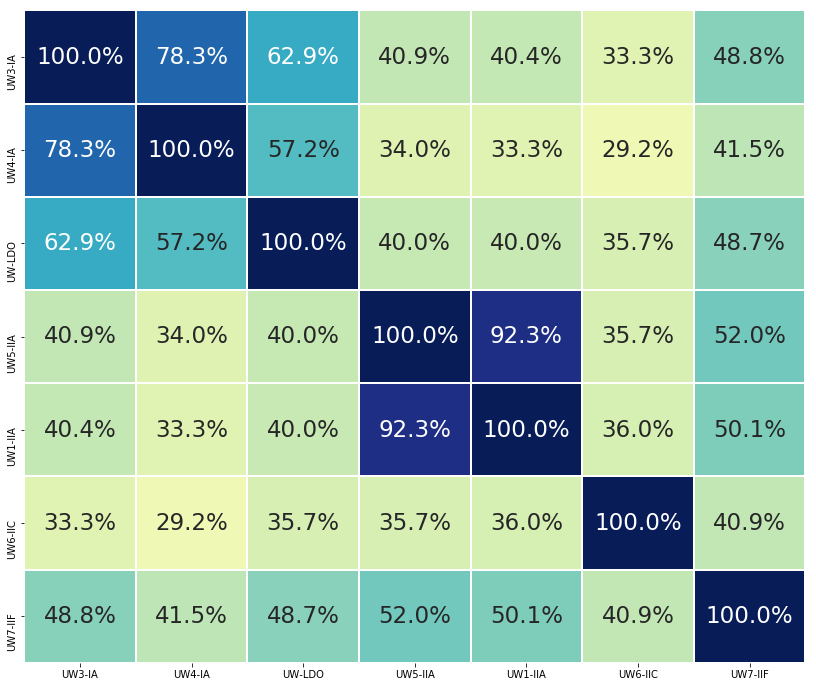

In [56]:
labels = ["UW3-IA", "UW4-IA", "UW-LDO", "UW5-IIA", "UW1-IIA", "UW6-IIC", "UW7-IIF"]
fig, ax = plt.subplots(figsize=(14,12))
sns_plot = sns.heatmap(cc, annot=True,vmin=0.20,vmax=1,linewidths=1,
            xticklabels=labels,fmt=".1%",yticklabels=labels,cmap="YlGnBu",cbar=False, annot_kws={"size": 23})
sns_plot.figure.savefig("../figures/heatmap.pdf")

In [8]:
uniq_info = gplot.find_unique_genes(mat, strains,groups)

2687453699
	 162 unique
	 30 missing
spades-bin.32
	 220 unique
	 229 missing
2767802316
	 19 unique
	 35 missing
GCA_000024165.1
	 101 unique
	 2 missing
2767802455
	 1039 unique
	 208 missing
Reactor4-bin.4
	 492 unique
	 86 missing
1781 common to all strains.


In [10]:
for x in uniq_info["unique"]["2687453699"][0:10]:
    print(x)
uw4_unique = gplot.find_unique_loci("spades-bin.32", "../results/pangenomics/pyparanoid/v2", uniq_info)
uw6_unique = gplot.find_unique_loci("2767802455", "../results/pangenomics/pyparanoid/v2", uniq_info)

group_02830
group_02942
group_02954
group_03105
group_03260
group_03349
group_03458
group_03459
group_03467
group_03770


In [17]:
plt.savefig("../figures/pearson_heatmap.png")

<Figure size 432x288 with 0 Axes>